In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
print('糖尿病分析僅限於課程使用')
print('如果有相關需求之後建議與醫生討論')
print('程式協助分析與取得可能的結果，後續得由專業人員進行判斷')
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.data.csv', header=None, names=col_names)
print(pima.head())
print('1-了解所有資料')
pima.to_html('pima1.html')
print('2-了解資料型態')
print(pima.dtypes)
print('3-了解資料是否有遺失值')
print(pima.isnull().any())
print('4-我們有多少筆資料：', pima.shape)
print('我們有哪些特徵')
print(pima.columns)

糖尿病分析僅限於課程使用
如果有相關需求之後建議與醫生討論
程式協助分析與取得可能的結果，後續得由專業人員進行判斷
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
1-了解所有資料
2-了解資料型態
pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object
3-了解資料是否有遺失值
pregnant    False
glucose     False
bp          False
skin        False
insulin     False
bmi         False
pedigree    False
age         False
label       False
dtype: bool
4-我們有多少筆資料： (768, 9)
我們有哪些特徵
Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dt

In [2]:
feature_cols = ['pregnant', 'glucose', 'bp',
                'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('下一個檔案建立模型')

下一個檔案建立模型


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

print('接下來進行標準化')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf_list = [
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(solver='lbfgs')),
    ('SVM', svm.SVC(probability=True))
]

接下來進行標準化


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('接下來開始進行訓練')
for model_tuple in clf_list:
    modelname = model_tuple[0]
    model = model_tuple[1]
    print('模型名稱:', modelname)
    # 分析是否需要random參數
    if 'random_state' in model.get_params().keys():
        print(modelname)
        model.set_params(random_state=42)
    model.fit(X_train, y_train)
    predict1 = model.predict(X_test)
    print('預估失敗的次數加總:', (y_test != predict1).sum())
    print('推估他的準確率:', accuracy_score(y_test, predict1))
    print('正確的方式推估他的混淆矩陣:\n', confusion_matrix(y_test, predict1))
    print(classification_report(y_test, predict1))

接下來開始進行訓練
模型名稱: Naive Bayes
預估失敗的次數加總: 64
推估他的準確率: 0.7229437229437229
正確的方式推估他的混淆矩陣:
 [[119  28]
 [ 36  48]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       147
           1       0.63      0.57      0.60        84

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

模型名稱: KNN
預估失敗的次數加總: 60
推估他的準確率: 0.7402597402597403
正確的方式推估他的混淆矩陣:
 [[121  26]
 [ 34  50]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       147
           1       0.66      0.60      0.62        84

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

模型名稱: Decision Tree
Decision Tree
預估失敗的次數加總: 67
推估他的準確率: 0.70995670995671
正確的方式推估他的混淆矩陣:
 [[117  30]
 [ 37  47]]
              precision    recall

接下來開始進行訓練
模型名稱: Naive Bayes
推估他的準確率: 0.7359307359307359
模型名稱: KNN
推估他的準確率: 0.7575757575757576
模型名稱: Decision Tree
推估他的準確率: 0.7186147186147186
模型名稱: Logistic Regression
推估他的準確率: 0.7705627705627706
模型名稱: SVM
推估他的準確率: 0.7835497835497836
模型名稱: Naive Bayes
推估他的準確率: 0.7359307359307359
模型名稱: KNN
推估他的準確率: 0.7359307359307359
模型名稱: Decision Tree
推估他的準確率: 0.7229437229437229
模型名稱: Logistic Regression
推估他的準確率: 0.7835497835497836
模型名稱: SVM
推估他的準確率: 0.7575757575757576
模型名稱: Naive Bayes
推估他的準確率: 0.7878787878787878
模型名稱: KNN
推估他的準確率: 0.7792207792207793
模型名稱: Decision Tree
推估他的準確率: 0.7142857142857143
模型名稱: Logistic Regression
推估他的準確率: 0.8051948051948052
模型名稱: SVM
推估他的準確率: 0.8051948051948052
模型名稱: Naive Bayes
推估他的準確率: 0.7792207792207793
模型名稱: KNN
推估他的準確率: 0.7186147186147186
模型名稱: Decision Tree
推估他的準確率: 0.6796536796536796
模型名稱: Logistic Regression
推估他的準確率: 0.8095238095238095
模型名稱: SVM
推估他的準確率: 0.7965367965367965
模型名稱: Naive Bayes
推估他的準確率: 0.7705627705627706
模型名稱: KNN
推估他的準確率: 0.7489177489177489
模型名稱: Deci

模型名稱: Naive Bayes
推估他的準確率: 0.7922077922077922
模型名稱: KNN
推估他的準確率: 0.8008658008658008
模型名稱: Decision Tree
推估他的準確率: 0.7532467532467533
模型名稱: Logistic Regression
推估他的準確率: 0.7878787878787878
模型名稱: SVM
推估他的準確率: 0.7878787878787878
模型名稱: Naive Bayes
推估他的準確率: 0.7792207792207793
模型名稱: KNN
推估他的準確率: 0.7705627705627706
模型名稱: Decision Tree
推估他的準確率: 0.70995670995671
模型名稱: Logistic Regression
推估他的準確率: 0.7922077922077922
模型名稱: SVM
推估他的準確率: 0.8008658008658008
模型名稱: Naive Bayes
推估他的準確率: 0.7619047619047619
模型名稱: KNN
推估他的準確率: 0.7489177489177489
模型名稱: Decision Tree
推估他的準確率: 0.6926406926406926
模型名稱: Logistic Regression
推估他的準確率: 0.7965367965367965
模型名稱: SVM
推估他的準確率: 0.7705627705627706
模型名稱: Naive Bayes
推估他的準確率: 0.7489177489177489
模型名稱: KNN
推估他的準確率: 0.7705627705627706
模型名稱: Decision Tree
推估他的準確率: 0.7272727272727273
模型名稱: Logistic Regression
推估他的準確率: 0.7532467532467533
模型名稱: SVM
推估他的準確率: 0.7489177489177489
模型名稱: Naive Bayes
推估他的準確率: 0.7316017316017316
模型名稱: KNN
推估他的準確率: 0.6926406926406926
模型名稱: Decision Tree
推估

模型名稱: Naive Bayes
推估他的準確率: 0.8008658008658008
模型名稱: KNN
推估他的準確率: 0.7922077922077922
模型名稱: Decision Tree
推估他的準確率: 0.670995670995671
模型名稱: Logistic Regression
推估他的準確率: 0.8138528138528138
模型名稱: SVM
推估他的準確率: 0.7922077922077922
模型名稱: Naive Bayes
推估他的準確率: 0.8051948051948052
模型名稱: KNN
推估他的準確率: 0.7792207792207793
模型名稱: Decision Tree
推估他的準確率: 0.6796536796536796
模型名稱: Logistic Regression
推估他的準確率: 0.8008658008658008
模型名稱: SVM
推估他的準確率: 0.8398268398268398
模型名稱: Naive Bayes
推估他的準確率: 0.7532467532467533
模型名稱: KNN
推估他的準確率: 0.7619047619047619
模型名稱: Decision Tree
推估他的準確率: 0.6883116883116883
模型名稱: Logistic Regression
推估他的準確率: 0.8051948051948052
模型名稱: SVM
推估他的準確率: 0.7835497835497836
模型名稱: Naive Bayes
推估他的準確率: 0.7402597402597403
模型名稱: KNN
推估他的準確率: 0.7186147186147186
模型名稱: Decision Tree
推估他的準確率: 0.6926406926406926
模型名稱: Logistic Regression
推估他的準確率: 0.7705627705627706
模型名稱: SVM
推估他的準確率: 0.7705627705627706
模型名稱: Naive Bayes
推估他的準確率: 0.7878787878787878
模型名稱: KNN
推估他的準確率: 0.7489177489177489
模型名稱: Decision Tree
推

推估他的準確率: 0.7878787878787878
推估他的準確率: 0.8225108225108225
推估他的準確率: 0.7705627705627706
推估他的準確率: 0.7705627705627706
軟投票
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7965367965367965
推估他的準確率: 0.7316017316017316
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.7922077922077922
推估他的準確率: 0.7619047619047619
推估他的準確率: 0.7748917748917749
推估他的準確率: 0.7878787878787878
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.8095238095238095
推估他的準確率: 0.7316017316017316
推估他的準確率: 0.7402597402597403
推估他的準確率: 0.7748917748917749
推估他的準確率: 0.7965367965367965
推估他的準確率: 0.7619047619047619
推估他的準確率: 0.7922077922077922
推估他的準確率: 0.7359307359307359
推估他的準確率: 0.7748917748917749
推估他的準確率: 0.8095238095238095
推估他的準確率: 0.7489177489177489
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.8311688311688312
推估他的準確率: 0.7748917748917749
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7229437229437229
推估他的準確率: 0.8181818181818182
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.7272727272727273
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.77922

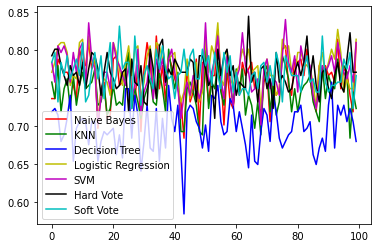

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
list1, list2, list3, list4, list5, list6 = [], [], [], [], [], []
list7 = []

clf_list = [
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(solver='lbfgs')),
    ('SVM', svm.SVC(probability=True))
]

print('接下來開始進行訓練')
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    for model_tuple in clf_list:
        modelname = model_tuple[0]
        model = model_tuple[1]
        print('模型名稱:', modelname)
        # 分析是否需要random參數
        if 'random_state' in model.get_params().keys():
            # print(modelname)
            model.set_params(random_state=42)
        model.fit(X_train, y_train)
        predict1 = model.predict(X_test)
        print('推估他的準確率:', accuracy_score(y_test, predict1))
        if modelname == 'Naive Bayes':
            list1.append(accuracy_score(y_test, predict1))
        if modelname == 'KNN':
            list2.append(accuracy_score(y_test, predict1))
        if modelname == 'Decision Tree':
            list3.append(accuracy_score(y_test, predict1))
        if modelname == 'Logistic Regression':
            list4.append(accuracy_score(y_test, predict1))
        if modelname == 'SVM':
            list5.append(accuracy_score(y_test, predict1))

print('每一個項目都跑完')
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    vote_clf = VotingClassifier(clf_list, voting='hard')
    vote_clf.fit(X_train, y_train)
    predict1 = vote_clf.predict(X_test)
    print('推估他的準確率:', accuracy_score(y_test, predict1))
    list6.append(accuracy_score(y_test, predict1))
print('軟投票')
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    vote_clf = VotingClassifier(clf_list, voting='soft', weights=[1, 1, 0, 6, 1])
    vote_clf.fit(X_train, y_train)
    predict1 = vote_clf.predict(X_test)
    print('推估他的準確率:', accuracy_score(y_test, predict1))
    list7.append(accuracy_score(y_test, predict1))
x1 = np.arange(100)
print('產生準確率的平均值')
print('Naive Bayes平均值:', np.mean(np.array(list1)))
print('KNN平均值:', np.mean(np.array(list2)))
print('Decision Tree平均值:', np.mean(np.array(list3)))
print('Logistic Regression平均值:', np.mean(np.array(list4)))
print('SVM平均值:', np.mean(np.array(list5)))
print('Hard Vote平均值:', np.mean(np.array(list6)))
print('Soft Vote平均值:', np.mean(np.array(list7)))
plt.plot(x1, list1, c='r', label='Naive Bayes')
plt.plot(x1, list2, c='g', label='KNN')
plt.plot(x1, list3, c='b', label='Decision Tree')
plt.plot(x1, list4, c='y', label='Logistic Regression')
plt.plot(x1, list5, c='m', label='SVM')
plt.plot(x1, list6, c='black', label='Hard Vote')
plt.plot(x1, list7, c='c', label='Soft Vote')
plt.legend(loc='lower left')
plt.show()

接下來開始進行訓練
模型名稱: Naive Bayes
推估他的準確率: 0.7792207792207793
模型名稱: KNN
推估他的準確率: 0.7662337662337663
模型名稱: Decision Tree
推估他的準確率: 0.6796536796536796
模型名稱: Logistic Regression
推估他的準確率: 0.8095238095238095
模型名稱: SVM
推估他的準確率: 0.7792207792207793
模型名稱: Naive Bayes
推估他的準確率: 0.7316017316017316
模型名稱: KNN
推估他的準確率: 0.7402597402597403
模型名稱: Decision Tree
推估他的準確率: 0.7012987012987013
模型名稱: Logistic Regression
推估他的準確率: 0.7792207792207793
模型名稱: SVM
推估他的準確率: 0.7619047619047619
模型名稱: Naive Bayes
推估他的準確率: 0.7748917748917749
模型名稱: KNN
推估他的準確率: 0.7705627705627706
模型名稱: Decision Tree
推估他的準確率: 0.7272727272727273
模型名稱: Logistic Regression
推估他的準確率: 0.8008658008658008
模型名稱: SVM
推估他的準確率: 0.8095238095238095
模型名稱: Naive Bayes
推估他的準確率: 0.7575757575757576
模型名稱: KNN
推估他的準確率: 0.7619047619047619
模型名稱: Decision Tree
推估他的準確率: 0.7575757575757576
模型名稱: Logistic Regression
推估他的準確率: 0.7662337662337663
模型名稱: SVM
推估他的準確率: 0.7662337662337663
模型名稱: Naive Bayes
推估他的準確率: 0.7402597402597403
模型名稱: KNN
推估他的準確率: 0.7056277056277056
模型名稱: Deci

推估他的準確率: 0.7272727272727273
模型名稱: Naive Bayes
推估他的準確率: 0.7619047619047619
模型名稱: KNN
推估他的準確率: 0.7272727272727273
模型名稱: Decision Tree
推估他的準確率: 0.6926406926406926
模型名稱: Logistic Regression
推估他的準確率: 0.7619047619047619
模型名稱: SVM
推估他的準確率: 0.7532467532467533
模型名稱: Naive Bayes
推估他的準確率: 0.70995670995671
模型名稱: KNN
推估他的準確率: 0.7272727272727273
模型名稱: Decision Tree
推估他的準確率: 0.7142857142857143
模型名稱: Logistic Regression
推估他的準確率: 0.7619047619047619
模型名稱: SVM
推估他的準確率: 0.7489177489177489
模型名稱: Naive Bayes
推估他的準確率: 0.7272727272727273
模型名稱: KNN
推估他的準確率: 0.70995670995671
模型名稱: Decision Tree
推估他的準確率: 0.6493506493506493
模型名稱: Logistic Regression
推估他的準確率: 0.7445887445887446
模型名稱: SVM
推估他的準確率: 0.7186147186147186
模型名稱: Naive Bayes
推估他的準確率: 0.7532467532467533
模型名稱: KNN
推估他的準確率: 0.7316017316017316
模型名稱: Decision Tree
推估他的準確率: 0.683982683982684
模型名稱: Logistic Regression
推估他的準確率: 0.7662337662337663
模型名稱: SVM
推估他的準確率: 0.7705627705627706
模型名稱: Naive Bayes
推估他的準確率: 0.8095238095238095
模型名稱: KNN
推估他的準確率: 0.78354978354978

推估他的準確率: 0.8095238095238095
模型名稱: Naive Bayes
推估他的準確率: 0.7965367965367965
模型名稱: KNN
推估他的準確率: 0.7619047619047619
模型名稱: Decision Tree
推估他的準確率: 0.7316017316017316
模型名稱: Logistic Regression
推估他的準確率: 0.8008658008658008
模型名稱: SVM
推估他的準確率: 0.7835497835497836
模型名稱: Naive Bayes
推估他的準確率: 0.7445887445887446
模型名稱: KNN
推估他的準確率: 0.7402597402597403
模型名稱: Decision Tree
推估他的準確率: 0.7186147186147186
模型名稱: Logistic Regression
推估他的準確率: 0.7662337662337663
模型名稱: SVM
推估他的準確率: 0.7835497835497836
模型名稱: Naive Bayes
推估他的準確率: 0.7835497835497836
模型名稱: KNN
推估他的準確率: 0.7316017316017316
模型名稱: Decision Tree
推估他的準確率: 0.6796536796536796
模型名稱: Logistic Regression
推估他的準確率: 0.7748917748917749
模型名稱: SVM
推估他的準確率: 0.7445887445887446
模型名稱: Naive Bayes
推估他的準確率: 0.7532467532467533
模型名稱: KNN
推估他的準確率: 0.7489177489177489
模型名稱: Decision Tree
推估他的準確率: 0.6796536796536796
模型名稱: Logistic Regression
推估他的準確率: 0.7619047619047619
模型名稱: SVM
推估他的準確率: 0.7619047619047619
模型名稱: Naive Bayes
推估他的準確率: 0.6926406926406926
模型名稱: KNN
推估他的準確率: 0.727272727

推估他的準確率: 0.7489177489177489
推估他的準確率: 0.7445887445887446
推估他的準確率: 0.7359307359307359
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7316017316017316
推估他的準確率: 0.6883116883116883
推估他的準確率: 0.7445887445887446
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.7748917748917749
推估他的準確率: 0.7359307359307359
推估他的準確率: 0.7445887445887446
推估他的準確率: 0.7575757575757576
推估他的準確率: 0.7705627705627706
推估他的準確率: 0.7316017316017316
推估他的準確率: 0.7316017316017316
推估他的準確率: 0.8138528138528138
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7619047619047619
推估他的準確率: 0.7489177489177489
推估他的準確率: 0.7316017316017316
推估他的準確率: 0.7402597402597403
推估他的準確率: 0.7575757575757576
推估他的準確率: 0.7619047619047619
推估他的準確率: 0.8095238095238095
推估他的準確率: 0.7142857142857143
推估他的準確率: 0.7922077922077922
推估他的準確率: 0.7186147186147186
推估他的準確率: 0.7489177489177489
推估他的準確率: 0.7748917748917749
推估他的準確率: 0.7705627705627706
推估他的準確率: 0.7662337662337663
推估他的準確率: 0.7835497835497836
推估他的準確率: 0.7922077922077922
推估他的準確率: 0.7705627705627706
推估他的準確率: 0.7142857142857143
推估他的準確率: 0.761904761

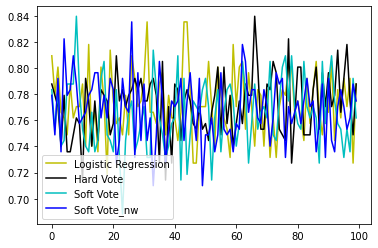

In [6]:

list1, list2, list3, list4,  = [], [], [], []
clf_list = [
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(solver='lbfgs')),
    ('SVM', svm.SVC(probability=True))
    
]
print('接下來開始進行訓練')
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    for model_tuple in clf_list:
        modelname = model_tuple[0]
        model = model_tuple[1]
        print('模型名稱:', modelname)
        # 分析是否需要random參數
        if 'random_state' in model.get_params().keys():
            # print(modelname)
            model.set_params(random_state=42)
        model.fit(X_train, y_train)
        predict1 = model.predict(X_test)
        print('推估他的準確率:', accuracy_score(y_test, predict1))

        if modelname == 'Logistic Regression':
            list1.append(accuracy_score(y_test, predict1))


print('每一個項目都跑完')
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    vote_clf = VotingClassifier(clf_list, voting='hard')
    vote_clf.fit(X_train, y_train)
    predict1 = vote_clf.predict(X_test)
    print('推估他的準確率:', accuracy_score(y_test, predict1))
    list2.append(accuracy_score(y_test, predict1))
print('軟投票')
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    vote_clf = VotingClassifier(clf_list, voting='soft', weights=[1, 1, 0, 6, 1])
    vote_clf.fit(X_train, y_train)
    predict1 = vote_clf.predict(X_test)
    print('推估他的準確率:', accuracy_score(y_test, predict1))
    list3.append(accuracy_score(y_test, predict1))
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    vote_clf = VotingClassifier(clf_list, voting='soft')
    vote_clf.fit(X_train, y_train)
    predict1 = vote_clf.predict(X_test)
    print('推估他的準確率:', accuracy_score(y_test, predict1))
    list4.append(accuracy_score(y_test, predict1))
x1 = np.arange(100)
print('產生準確率的平均值')

print('Logistic Regression平均值:', np.mean(np.array(list1)))
print('Hard Vote平均值:', np.mean(np.array(list2)))
print('Soft Vote平均值:', np.mean(np.array(list3)))
print('Soft Vote_nw平均值:', np.mean(np.array(list4)))

plt.plot(x1, list1, c='y', label='Logistic Regression')
plt.plot(x1, list2, c='black', label='Hard Vote')
plt.plot(x1, list3, c='c', label='Soft Vote')
plt.plot(x1, list4, c='b', label='Soft Vote_nw')
plt.legend(loc='lower left')
plt.show()

模型名稱: DecisionTree
推估他的準確率: 0.70995670995671
模型名稱: RandomForest
推估他的準確率: 0.7878787878787878
模型名稱: Bagging
推估他的準確率: 0.7922077922077922
模型名稱: AdaBoost
推估他的準確率: 0.7489177489177489
模型名稱: DecisionTree
推估他的準確率: 0.6926406926406926
模型名稱: RandomForest
推估他的準確率: 0.7878787878787878
模型名稱: Bagging
推估他的準確率: 0.7792207792207793
模型名稱: AdaBoost
推估他的準確率: 0.7748917748917749
模型名稱: DecisionTree
推估他的準確率: 0.696969696969697
模型名稱: RandomForest
推估他的準確率: 0.7316017316017316
模型名稱: Bagging
推估他的準確率: 0.7445887445887446
模型名稱: AdaBoost
推估他的準確率: 0.7489177489177489
模型名稱: DecisionTree
推估他的準確率: 0.6623376623376623
模型名稱: RandomForest
推估他的準確率: 0.7792207792207793
模型名稱: Bagging
推估他的準確率: 0.7619047619047619
模型名稱: AdaBoost
推估他的準確率: 0.7272727272727273
模型名稱: DecisionTree
推估他的準確率: 0.6666666666666666
模型名稱: RandomForest
推估他的準確率: 0.7359307359307359
模型名稱: Bagging
推估他的準確率: 0.7316017316017316
模型名稱: AdaBoost
推估他的準確率: 0.7272727272727273
模型名稱: DecisionTree
推估他的準確率: 0.6796536796536796
模型名稱: RandomForest
推估他的準確率: 0.7619047619047619
模型名稱: Bagging


模型名稱: DecisionTree
推估他的準確率: 0.6796536796536796
模型名稱: RandomForest
推估他的準確率: 0.7359307359307359
模型名稱: Bagging
推估他的準確率: 0.7662337662337663
模型名稱: AdaBoost
推估他的準確率: 0.7359307359307359
模型名稱: DecisionTree
推估他的準確率: 0.7662337662337663
模型名稱: RandomForest
推估他的準確率: 0.7316017316017316
模型名稱: Bagging
推估他的準確率: 0.7272727272727273
模型名稱: AdaBoost
推估他的準確率: 0.7012987012987013
模型名稱: DecisionTree
推估他的準確率: 0.6623376623376623
模型名稱: RandomForest
推估他的準確率: 0.7662337662337663
模型名稱: Bagging
推估他的準確率: 0.7575757575757576
模型名稱: AdaBoost
推估他的準確率: 0.7272727272727273
模型名稱: DecisionTree
推估他的準確率: 0.7489177489177489
模型名稱: RandomForest
推估他的準確率: 0.8138528138528138
模型名稱: Bagging
推估他的準確率: 0.7792207792207793
模型名稱: AdaBoost
推估他的準確率: 0.7316017316017316
模型名稱: DecisionTree
推估他的準確率: 0.696969696969697
模型名稱: RandomForest
推估他的準確率: 0.7662337662337663
模型名稱: Bagging
推估他的準確率: 0.7662337662337663
模型名稱: AdaBoost
推估他的準確率: 0.7662337662337663
模型名稱: DecisionTree
推估他的準確率: 0.696969696969697
模型名稱: RandomForest
推估他的準確率: 0.7229437229437229
模型名稱: Bagging

推估他的準確率: 0.7445887445887446
模型名稱: DecisionTree
推估他的準確率: 0.696969696969697
模型名稱: RandomForest
推估他的準確率: 0.7662337662337663
模型名稱: Bagging
推估他的準確率: 0.7402597402597403
模型名稱: AdaBoost
推估他的準確率: 0.7532467532467533
模型名稱: DecisionTree
推估他的準確率: 0.7186147186147186
模型名稱: RandomForest
推估他的準確率: 0.7532467532467533
模型名稱: Bagging
推估他的準確率: 0.7748917748917749
模型名稱: AdaBoost
推估他的準確率: 0.7229437229437229
模型名稱: DecisionTree
推估他的準確率: 0.7186147186147186
模型名稱: RandomForest
推估他的準確率: 0.7878787878787878
模型名稱: Bagging
推估他的準確率: 0.7835497835497836
模型名稱: AdaBoost
推估他的準確率: 0.7705627705627706
模型名稱: DecisionTree
推估他的準確率: 0.6796536796536796
模型名稱: RandomForest
推估他的準確率: 0.7965367965367965
模型名稱: Bagging
推估他的準確率: 0.8051948051948052
模型名稱: AdaBoost
推估他的準確率: 0.8138528138528138
模型名稱: DecisionTree
推估他的準確率: 0.7489177489177489
模型名稱: RandomForest
推估他的準確率: 0.7619047619047619
模型名稱: Bagging
推估他的準確率: 0.7575757575757576
模型名稱: AdaBoost
推估他的準確率: 0.7662337662337663
模型名稱: DecisionTree
推估他的準確率: 0.658008658008658
模型名稱: RandomForest
推估他的準確率: 0.72

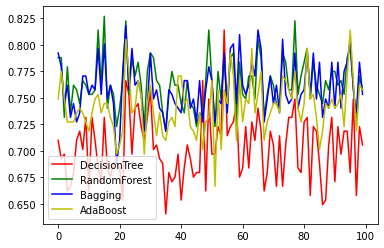

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

list1, list2, list3, list4 = [], [], [], []
tree = DecisionTreeClassifier()
clf_list = [('DecisionTree', DecisionTreeClassifier()),
            ('RandomForest', RandomForestClassifier(n_estimators=100)),
            ('Bagging', BaggingClassifier(tree, n_estimators=100)),
            ('AdaBoost', AdaBoostClassifier(n_estimators=100))]

# --------------------------模型訓練 - -------------------------
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    for model_tuple in clf_list:
        modelname = model_tuple[0]
        model = model_tuple[1]
        model.fit(X_train, y_train)
        print('模型名稱:', modelname)
        # 分析是否需要random參數
        if 'random_state' in model.get_params().keys():
            # print(modelname)
            model.set_params(random_state=42)
        model.fit(X_train, y_train)
        predict1 = model.predict(X_test)
        print('推估他的準確率:', accuracy_score(y_test, predict1))
        if modelname == 'DecisionTree':
            list1.append(accuracy_score(y_test, predict1))
        if modelname == 'RandomForest':
            list2.append(accuracy_score(y_test, predict1))
        if modelname == 'Bagging':
            list3.append(accuracy_score(y_test, predict1))
        if modelname == 'AdaBoost':
            list4.append(accuracy_score(y_test, predict1))

print('DecisionTree平均值:',np.mean(np.array(list1)))
print('RandomForest平均值:',np.mean(np.array(list2)))
print('Bagging平均值:',np.mean(np.array(list3)))
print('AdaBoost平均值:', np.mean(np.array(list4)))

x1 = np.arange(100)
plt.plot(x1, list1, c='r', label='DecisionTree')
plt.plot(x1, list2, c='g', label='RandomForest')
plt.plot(x1, list3, c='b', label='Bagging')
plt.plot(x1, list4, c='y', label='AdaBoost')
plt.legend(loc='lower left')
plt.show()
